# 编程练习6：支持向量机
## 1 支持向量机
### 1.1 数据样例
这里我们先将样例数据1画出来，然后用线性支持向量机求解，并比较C=1和C=100的区别。

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import LinearSVC

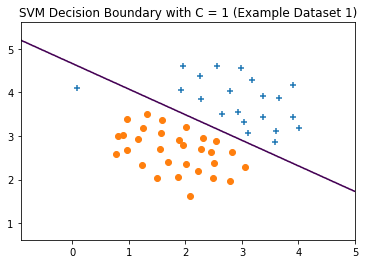

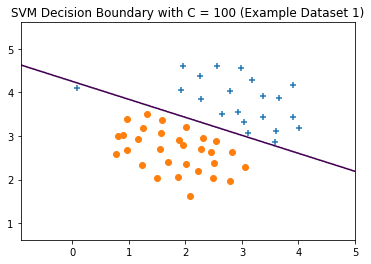

In [60]:
raw_data = loadmat('ex6data1.mat')
df = pd.DataFrame(np.column_stack([raw_data['X'], raw_data['y']]))
pos = df[df[2]==1]
neg = df[df[2]==0]
X = pd.DataFrame(raw_data['X'])
y = np.array(raw_data['y']).flatten()
x1,x2 = np.meshgrid(np.arange(X[0].min()-1,X[0].max()+1,0.01), np.arange(X[1].min()-1,X[1].max()+1,0.01))
lsvc = LinearSVC(C=1.0)
lsvc.fit(X, y)
z = lsvc.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM Decision Boundary with C = 1 (Example Dataset 1)')
plt.show()
lsvc = LinearSVC(C=100.0)
lsvc.fit(X, y)
z = lsvc.predict(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)
fig,ax = plt.subplots()
ax.scatter(pos[0], pos[1], marker='+')
ax.scatter(neg[0], neg[1], marker='o')
ax.contour(x1, x2, z, 1)
plt.title('SVM Decision Boundary with C = 100 (Example Dataset 1)')
plt.show()

### 1.2 高斯核函数支持向量机